#### PART 1

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

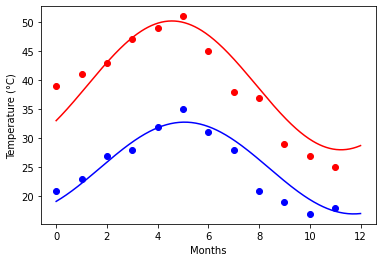

In [23]:
#periodic function
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

months= np.arange(12)
 
def pf_temp(time, avg, amp, offset): 
    return (avg + amp* np.cos((time + offset) *1.8 *np.pi /time.max()))

X_max, y_max = optimize.curve_fit(pf_temp, months,Max, [50, 20, 0]) 
X_min, y_min = optimize.curve_fit(pf_temp, months,Min, [-50, 20, 0])

days = np.linspace(0, 12, num=365) 
plt.figure() 
plt.plot(months,Max, 'ro') 
plt.plot(days, pf_temp(days, *X_max), 'r-') 
plt.plot(months,Min, 'bo') 
plt.plot(days, pf_temp(days, *X_min), 'b-') 
plt.xlabel('Months') 
plt.ylabel('Temperature (°C)') 
plt.show()

#### PART 2

In [24]:
df= pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

In [25]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [26]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

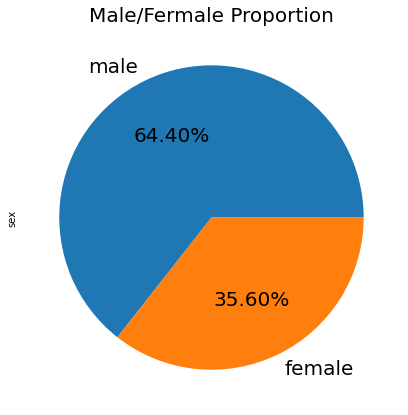

In [27]:
plt.figure(figsize=(7,7))
df['sex'].value_counts().plot(kind='pie', title= 'Male/Female Proportion', autopct="%.2f%%", fontsize=20)
plt.title("Male/Fermale Proportion", fontsize=20)
plt.show()

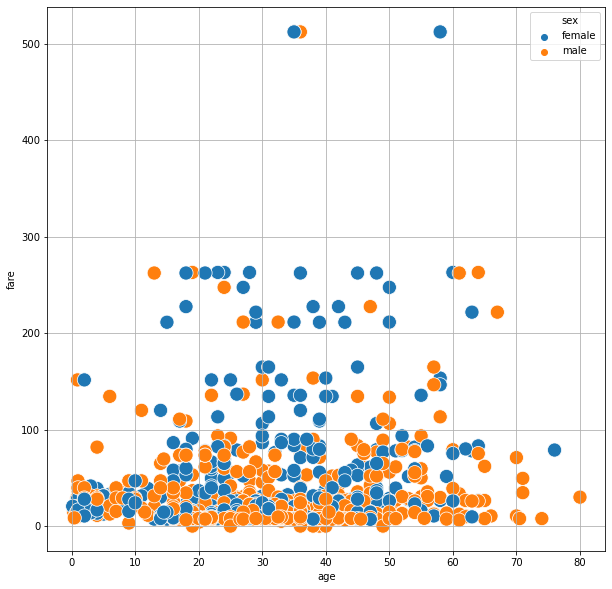

In [28]:
import seaborn as sns
fig, ax= plt.subplots()
fig.set_size_inches(10, 10)
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
sns.scatterplot(data= df, y= 'fare', x='age', hue ='sex', s=200)
plt.show()